symbol  #

Refer to kaggle for some of the info abt the values in the dataset: https://www.kaggle.com/datasets/ruchi798/housing-prices-in-metropolitan-areas-of-india

refer to https://docs.google.com/document/d/1yYUgte33HXMTPtl4o__8KIM1815iXd0lRglfojdgSnk/edit?usp=drivesdk, and FAI machine learning flow (rmb to feature engineering by geeks for geeks)

Low Sim Chuan (TP065697) <br>
Objective: To analyze and predict the trend of house prices in different metropolitan areas.<br>
Scopes/Deliverables:<br>
-	Analyze the distribution of house prices across different metropolitan areas. <br>
-	Perform correlation analysis between the area of the house and its price.<br>
-	Assess the impact of the amenities on house prices.<br>
-	Compare the prices of resale properties with new properties.<br>
-	Build, train, and tune the models to predict house prices based on historical and current data.<br>
-	Build, train, and tune the models to predict the likelihood of resale properties and their price premiums  based on historical and current data.<br>


# Loading the dataset

In [1]:
import pandas as pd
path_bangalore = "real_estate_india\Bangalore.csv"
path_chennai = "real_estate_india\Chennai.csv"
path_delhi = "real_estate_india\Delhi.csv"
path_hyderabad = "real_estate_india\Hyderabad.csv"
path_kolkata = "real_estate_india\Kolkata.csv"
path_mumbai = "real_estate_india\Mumbai.csv"
df_bangalore = pd.read_csv(path_bangalore)
df_chennai = pd.read_csv(path_chennai)
df_delhi = pd.read_csv(path_delhi)
df_hyderabad = pd.read_csv(path_hyderabad)
df_kolkata = pd.read_csv(path_kolkata)
df_mumbai = pd.read_csv(path_mumbai)
df_bangalore["metropolitan_area"] = "Bangalore"
df_chennai["metropolitan_area"] = "Chennai"
df_delhi["metropolitan_area"] = "Delhi"
df_hyderabad["metropolitan_area"] = "Hyderabad"
df_kolkata["metropolitan_area"] = "Kolkata"
df_mumbai["metropolitan_area"] = "Mumbai"
ds = pd.concat([df_bangalore, df_chennai, df_delhi, df_hyderabad, df_kolkata, df_mumbai], ignore_index=True, axis=0)
print(ds.shape)

(32963, 41)


# Data Preprocessing

## Data Cleaning

### Data inspection and exploration

In [2]:
ds.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'metropolitan_area'],
      dtype='object')

In [3]:
ds[["Price", "Area", "No. of Bedrooms"]].describe()

,Price,Area,No. of Bedrooms
count,3.296300e+04,32955.000000,32956.000000
mean,1.168672e+07,1293.376149,2.411791
std,2.307368e+07,763.781984,0.812820
min,2.000000e+06,200.000000,1.000000
25%,4.071500e+06,853.000000,2.000000
50%,6.711000e+06,1125.000000,2.000000
75%,1.200000e+07,1500.000000,3.000000
max,8.546000e+08,16000.000000,9.000000


### Handling missing data

In [4]:
ame = ["MaintenanceStaff", "Gymnasium", "SwimmingPool", "LandscapedGardens", "JoggingTrack", "RainWaterHarvesting",
      "IndoorGames", "ShoppingMall", "Intercom", "SportsFacility", "ATM", "ClubHouse", "", ""]

In [5]:
from numpy import nan
# replacing 9 by NaN
for i in range(5, 40):
    ds.iloc[:, i].replace(9, nan, inplace=True)
for i in range(5, 40):
    print(f"For col {ds.columns[i]}, percentage of missing val = " + str((ds.iloc[:, i].isnull().sum() * 100)/ds.shape[0]) + "%")

For col MaintenanceStaff, percentage of missing val = 69.38082092042593%
For col Gymnasium, percentage of missing val = 69.38082092042593%
For col SwimmingPool, percentage of missing val = 69.38082092042593%
For col LandscapedGardens, percentage of missing val = 69.38082092042593%
For col JoggingTrack, percentage of missing val = 69.38082092042593%
For col RainWaterHarvesting, percentage of missing val = 69.38082092042593%
For col IndoorGames, percentage of missing val = 69.38082092042593%
For col ShoppingMall, percentage of missing val = 69.38082092042593%
For col Intercom, percentage of missing val = 69.38082092042593%
For col SportsFacility, percentage of missing val = 69.38082092042593%
For col ATM, percentage of missing val = 69.38082092042593%
For col ClubHouse, percentage of missing val = 69.38082092042593%
For col School, percentage of missing val = 69.38082092042593%
For col 24X7Security, percentage of missing val = 69.38082092042593%
For col PowerBackup, percentage of missing

In [6]:
print(f"For col Price, percentage of missing val = " + str((ds["Price"].isnull().sum() * 100)/ds.shape[0]) + "%")
print(f"For col Area, percentage of missing val = " + str((ds["Area"].isnull().sum() * 100)/ds.shape[0]) + "%")
print(f"For col Location, percentage of missing val = " + str((ds["Location"].isnull().sum() * 100)/ds.shape[0]) + "%")
print(f"For col No. of Bedrooms, percentage of missing val = " + str((ds["No. of Bedrooms"].isnull().sum() * 100)/ds.shape[0]) + "%")
print(f"For col Resale, percentage of missing val = " + str((ds["Resale"].isnull().sum() * 100)/ds.shape[0]) + "%")

For col Price, percentage of missing val = 0.0%
For col Area, percentage of missing val = 0.024269635652094772%
For col Location, percentage of missing val = 0.02730334010860662%
For col No. of Bedrooms, percentage of missing val = 0.021235931195582928%
For col Resale, percentage of missing val = 0.0%


Coorelation between Price and Area = 0.2950602112750889
Skewness of `Area` =  3.500483434418256
Median area =  1125.0


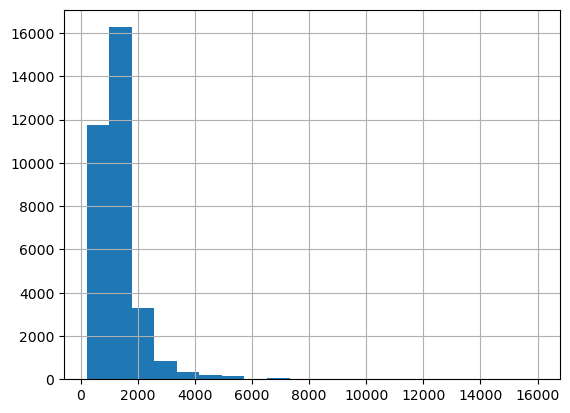

In [7]:
print("Coorelation between Price and Area = " + str(ds["Price"].corr(ds["Area"])))
ds["Area"].hist(bins=20)
print("Skewness of `Area` = ", ds["Area"].skew())
# median imputation
median_area = ds['Area'].median()
ds['Area'].fillna(median_area, inplace=True)
print("Median area = ", median_area)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# selecting relevant features
tree_ds = ds[["Price", "Location", "No. of Bedrooms"]]
# Assigning unique label to col `Location` of tree_ds
label_encoder = LabelEncoder()
train_data = tree_ds.dropna()
train_data['Location'] = label_encoder.fit_transform(train_data['Location'])
# print("sum of NA in `Location` = ", ds["Location"].isnull().sum())
# print("sum of NA in `Location` in tree_ds = ", tree_ds["Location"].isnull().sum())
# print("sum of NA in `Location` in tree_ds = ", tree_ds["Location"].isnull().sum())
missing_data_location = tree_ds[tree_ds["Location"].isnull()]

# Train a Decision Tree Classifier for imputing `Location`
model_loc = DecisionTreeClassifier()
model_loc.fit(train_data[['Price', 'No. of Bedrooms']], train_data['Location'])
# Impute the `Location` by predicting the missing values
predicted_locs = model_loc.predict(missing_data_location[['Price', 'No. of Bedrooms']])
# `inverse_transform()` is to convert the numeric labels into original categories
ds.loc[ds['Location'].isnull(), 'Location'] = label_encoder.inverse_transform(predicted_locs)
# Check after imputation
print(f"After imputation, For col Location, percentage of missing val = " + str((ds["Location"].isnull().sum() * 100)/ds.shape[0]) + "%")

C:\Users\User\AppData\Local\Temp\ipykernel_3932\972570031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Location'] = label_encoder.fit_transform(train_data['Location'])


After imputation, For col Location, percentage of missing val = 0.0%


In [9]:
# dropping records with NaN in column `No. of Bedrooms`
print(ds.shape)
ds.dropna(subset=['No. of Bedrooms'], inplace=True)
print(ds.shape)

(32963, 41)
(32956, 41)


### Handling outliers

Ways of detecting outliers:
- Manual inspection, such as someone is recorded as 1001 years old
- Boxplot
- Regression line to visualise it, then catch the outliers manually


### Incomplete data

### Inconsistent data

### Noisy data

## Feature engineering

Maybe transform the location into some values, and also transform the metro_area into values. Then combine the tables tgt by adding one more column called `metro_area`.

Do price/area.

# EDA

EDA must solve the objectives proposed b4

## Single Variate

## Multivariate